### YOLOv5m

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt  

import torch
from yolov5 import utils
display = utils.notebook_init()  

YOLOv5 🚀 v6.0-207-g8efe977 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (4 CPUs, 25.5 GB RAM, 42.1/166.8 GB disk)


In [ ]:
!unzip /content/drive/MyDrive/UncannyCompleteDataset.zip -d /content/

In [ ]:
!rm -rf /content/__MACOSX

In [ ]:
import shutil, random, os
import json
import cv2
from google.colab.patches import cv2_imshow
from tqdm import tqdm_notebook

In [ ]:
print(len(os.listdir('/content/UncannyCompleteDataset/jsons')))
print(len(os.listdir('/content/UncannyCompleteDataset/images')))

10067
10067


In [ ]:
f = open('/content/UncannyCompleteDataset/jsons/50056768_TN34V3058_fullimage.json')
data = json.load(f)
print(data)

width = data['width']
height = data['height']

for i in data['bbox']:
  if i['name'] == 'vehicle':
    print(i['coordinates'])
    xmin = i['coordinates']['xmin']
    ymin = i['coordinates']['ymin']
    ymax = i['coordinates']['ymax']
    xmax = i['coordinates']['xmax']
    print(xmin, xmax)

norm_x = ((xmin+xmax)/2)/width
print(norm_x)
norm_y = ((ymin+ymax)/2)/height
print(norm_y)
norm_w = (xmax-xmin)/width
print(norm_w)
norm_h = (ymax-ymin)/height
print(norm_h)

# print(data['bbox'][0])
# print(data['bbox'][0]['coordinates'])
# xmin = data['bbox'][0]['coordinates']['xmin']

{'contributors': ['David'], 'database': 'Unknown', 'filename': '50056768_TN34V3058_fullimage.jpg', 'height': 960, 'width': 1280, 'depth': 1, 'version': 'Everest-v4.8', 'bbox': [{'attributes': {'Type': {'Truck': {}}}, 'name': 'vehicle', 'coordinates': {'xmin': 160, 'ymin': 1, 'ymax': 480, 'xmax': 1028}, 'difficult': 0}, {'attributes': {}, 'name': 'Number-Plate', 'coordinates': {'xmin': 535, 'ymin': 323, 'ymax': 408, 'xmax': 698}, 'difficult': 0}], 'path': '/home/uncanny/1_David/Lane images/img/50056768_TN34V3058_fullimage.jpg', 'folder': 'img', 'foldername': 'img', 'points': []}
{'xmin': 160, 'ymin': 1, 'ymax': 480, 'xmax': 1028}
160 1028
0.4640625
0.25052083333333336
0.678125
0.49895833333333334


In [ ]:
f = open('/content/UncannyCompleteDataset/jsons/50056768_TN34V3058_fullimage.json')
data = json.load(f)
print(data)

for i in data['bbox']:
  if i['name'] == 'vehicle':
    xmin = i['coordinates']['xmin']
    ymin = i['coordinates']['ymin']
    ymax = i['coordinates']['ymax']
    xmax = i['coordinates']['xmax']

w_img=data['width']
h_img=data['height']

w=xmax-xmin
h=ymax-ymin
xcenter=(xmin+w/2)/(w_img)
ycenter=(ymin+h/2)/(h_img)
w=w/w_img
h=h/h_img

print(xcenter, ycenter, w, h)

{'contributors': ['David'], 'database': 'Unknown', 'filename': '50056768_TN34V3058_fullimage.jpg', 'height': 960, 'width': 1280, 'depth': 1, 'version': 'Everest-v4.8', 'bbox': [{'attributes': {'Type': {'Truck': {}}}, 'name': 'vehicle', 'coordinates': {'xmin': 160, 'ymin': 1, 'ymax': 480, 'xmax': 1028}, 'difficult': 0}, {'attributes': {}, 'name': 'Number-Plate', 'coordinates': {'xmin': 535, 'ymin': 323, 'ymax': 408, 'xmax': 698}, 'difficult': 0}], 'path': '/home/uncanny/1_David/Lane images/img/50056768_TN34V3058_fullimage.jpg', 'folder': 'img', 'foldername': 'img', 'points': []}
0.4640625 0.25052083333333336 0.678125 0.49895833333333334


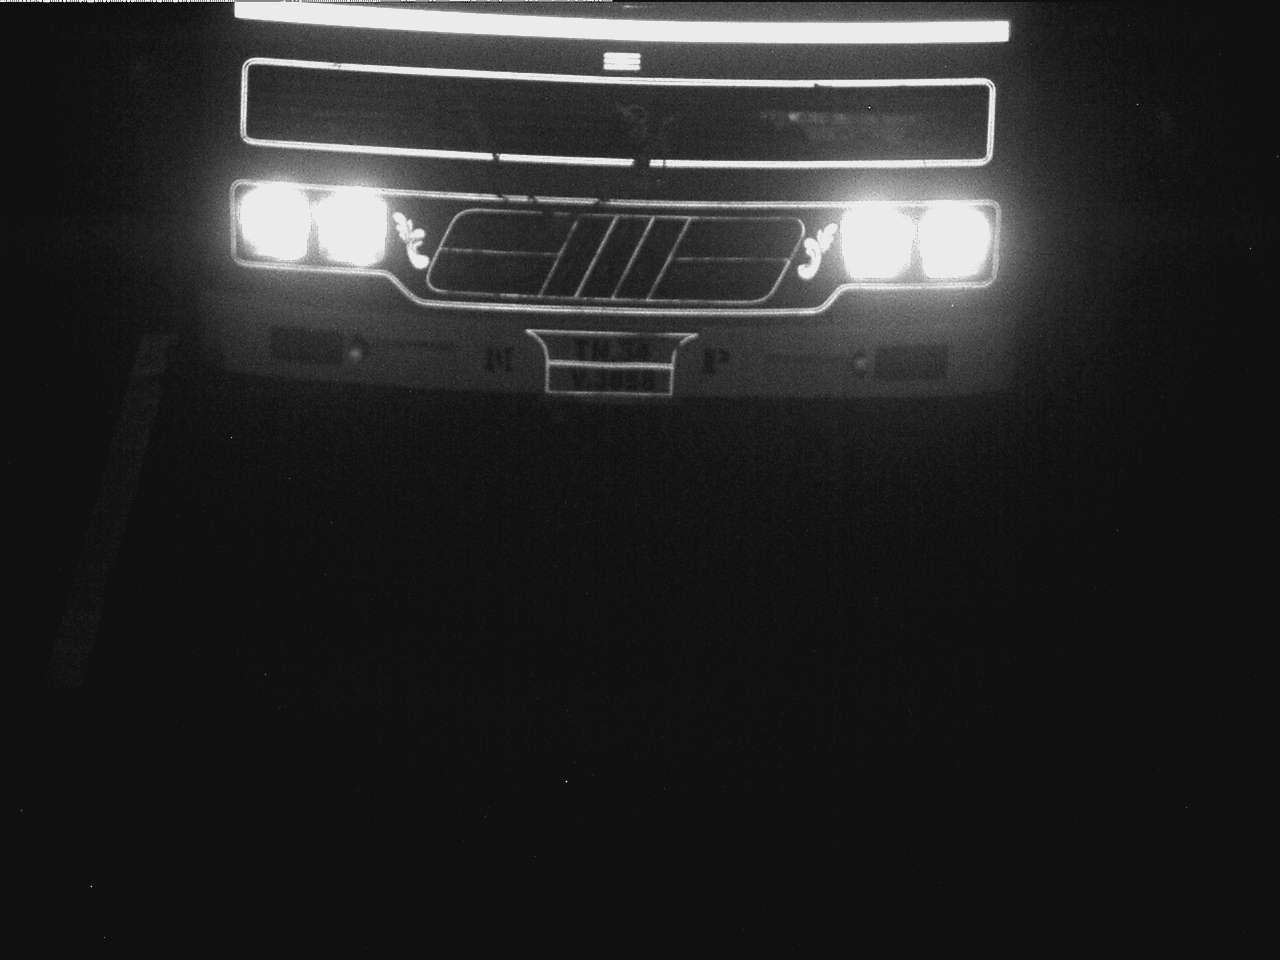

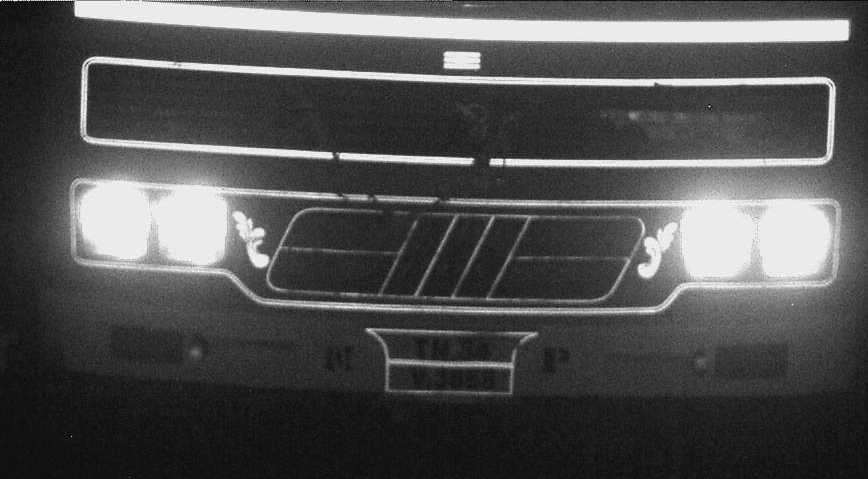

TypeError: ignored

In [ ]:
img = cv2.imread('/content/UncannyCompleteDataset/images/50056768_TN34V3058_fullimage.jpg')
cv2_imshow(img)
crop_img = img[ymin:ymax, xmin:xmax]
cv2_imshow(crop_img)
norm_crop = img[norm_y:norm_y+norm_h, norm_x:norm_x+norm_w]
cv2_imshow(norm_crop)

In [ ]:
!rm -rf /content/UncannyCompleteDataset/txts
!mkdir /content/UncannyCompleteDataset/txts

In [ ]:
json_files = '/content/UncannyCompleteDataset/jsons'
for k in tqdm_notebook(os.listdir(json_files)):
  json_file=os.path.join(json_files ,k)
  with open(json_file) as file:
    data=json.load(file)

    width = data['width']
    height = data['height']

    for i in data['bbox']:
      if i['name'] == 'vehicle':
        # print(i['coordinates'])
        xmin = i['coordinates']['xmin']
        ymin = i['coordinates']['ymin']
        ymax = i['coordinates']['ymax']
        xmax = i['coordinates']['xmax']
        # print(xmin, xmax)

    norm_x = ((xmin+xmax)/2)/width
    # print(norm_x)
    norm_y = ((ymin+ymax)/2)/height
    # print(norm_y)
    norm_w = (xmax-xmin)/width
    # print(norm_w)
    norm_h = (ymax-ymin)/height
    # print(norm_h)
    
    txt_files = '/content/UncannyCompleteDataset/txts'
    txt_file=k.split('.')[0]+".txt"
    path=os.path.join(txt_files ,txt_file)
    with open(path,'w') as z:
      z.write('0 '+ str(norm_x)+' '+str(norm_y)+" "+ str(norm_w)+ " "+ str(norm_h))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/10067 [00:00<?, ?it/s]

In [ ]:
!mkdir /content/Uncanny_Vehicle_Yolov5m
!mkdir /content/Uncanny_Vehicle_Yolov5m/training
!mkdir /content/Uncanny_Vehicle_Yolov5m/validation
!mkdir /content/Uncanny_Vehicle_Yolov5m/training/images
!mkdir /content/Uncanny_Vehicle_Yolov5m/training/labels
!mkdir /content/Uncanny_Vehicle_Yolov5m/validation/images
!mkdir /content/Uncanny_Vehicle_Yolov5m/validation/labels

In [ ]:
img_dirpath = '/content/UncannyCompleteDataset/images'
txt_dirpath = '/content/UncannyCompleteDataset/txts'
img_destDirectory = '/content/Uncanny_Vehicle_Yolov5m/validation/images'
txt_destDirectory = '/content/Uncanny_Vehicle_Yolov5m/validation/labels'

filenames = random.sample(os.listdir(img_dirpath), 1000)
for fname in filenames:
  srcpath = os.path.join(img_dirpath, fname)
  shutil.move(srcpath, img_destDirectory)
  txt_name=os.path.join(txt_dirpath ,fname.split('.')[0]+'.txt')
  txt_srcpath = os.path.join(txt_dirpath, txt_name)
  shutil.move(txt_srcpath, txt_destDirectory)

In [ ]:
print(len(os.listdir('/content/Uncanny_Vehicle_Yolov5m/validation/images')))
print(len(os.listdir('/content/Uncanny_Vehicle_Yolov5m/validation/images')))

print(len(os.listdir('/content/UncannyCompleteDataset/images')))
print(len(os.listdir('/content/UncannyCompleteDataset/txts')))

1000
1000
9067
9067


In [ ]:
img_dirpath = '/content/UncannyCompleteDataset/images'
txt_dirpath = '/content/UncannyCompleteDataset/txts'
img_destDirectory = '/content/Uncanny_Vehicle_Yolov5m/training/images'
txt_destDirectory = '/content/Uncanny_Vehicle_Yolov5m/training/labels'

for fname in os.listdir(img_dirpath):
  srcpath = os.path.join(img_dirpath, fname)
  shutil.move(srcpath, img_destDirectory)
  txt_name=os.path.join(txt_dirpath ,fname.split('.')[0]+'.txt')
  txt_srcpath = os.path.join(txt_dirpath, txt_name)
  shutil.move(txt_srcpath, txt_destDirectory)

In [ ]:
print(len(os.listdir('/content/Uncanny_Vehicle_Yolov5m/validation/images')))
print(len(os.listdir('/content/Uncanny_Vehicle_Yolov5m/validation/images')))

print(len(os.listdir('/content/Uncanny_Vehicle_Yolov5m/training/images')))
print(len(os.listdir('/content/Uncanny_Vehicle_Yolov5m/training/images')))

print(len(os.listdir('/content/UncannyCompleteDataset/images')))
print(len(os.listdir('/content/UncannyCompleteDataset/txts')))

1000
1000
9067
9067
0
0


In [ ]:
!zip -r /content/Uncanny_Vehicle_Yolov5m.zip /content/Uncanny_Vehicle_Yolov5m

In [ ]:
!unzip /content/drive/MyDrive/Shats/Uncanny_Vehicle_Yolov5m.zip

unzip:  cannot find or open /content/drive/MyDrive/Shats/Uncanny_Vehicle_Yolov5m.zip, /content/drive/MyDrive/Shats/Uncanny_Vehicle_Yolov5m.zip.zip or /content/drive/MyDrive/Shats/Uncanny_Vehicle_Yolov5m.zip.ZIP.


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!python train.py --img 960 --batch 16 --epochs 20 --data customdata.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=customdata.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=20, batch_size=16, imgsz=960, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-207-g8efe977 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=

In [ ]:
from utils.plots import plot_results
plot_results('/content/yolov5/runs/train/exp/results.csv')

In [ ]:
!zip -r /content/yolov5m.zip /content/yolov5

### Inference on YOLOv5m

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -qr requirements.txt 

In [ ]:
!unzip /content/drive/MyDrive/Uncanny_VehicleDetection_Retraining/yolov5m.zip

In [ ]:
!python detect.py --source /content/drive/MyDrive/Uncanny_VehicleDetection_Retraining/test.mp4 --weights /content/yolov5/content/yolov5/runs/train/exp/weights/best.pt --save-crop 

In [ ]:
!python detect.py --source /content/drive/MyDrive/Uncanny_VehicleDetection_Retraining/test.mp4 --weights /content/drive/MyDrive/Uncanny_VehicleDetection_Retraining/yolov5m.pt --save-crop 

In [ ]:
!zip -r /content/yolo_test.zip /content/yolov5/runs/detect/

### YOLOv3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet

/content
Cloning into 'darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 14.02 MiB | 14.13 MiB/s, done.
Resolving deltas: 100% (10353/10353), done.
/content/darknet


In [ ]:
!make

In [ ]:
!./darknet

usage: ./darknet <function>


change GPU=1, CUDNN=1, OPENCV=1 in darknet/Makefile


In [ ]:
!wget https://pjreddie.com/media/files/darknet19.weights

In [ ]:
!./darknet detect cfg/yolo.cfg darknet19.weights data/dog.jpg

In [ ]:
!./darknet classifier predict cfg/imagenet1k.data cfg/darknet19.cfg darknet19.weights data/dog.jpg

In [ ]:
import os, shutil

In [ ]:
!rm -rf /content/content
!unzip /content/drive/MyDrive/Uncanny_Vehicle_Yolov5m.zip -d '/content/'

In [ ]:
!rm -rf /content/yolov3_data
!mkdir /content/yolov3_data

In [ ]:
source = '/content/content/Uncanny_Vehicle_Yolov5m/training/labels'
# source = '/content/content/Uncanny_Vehicle_Yolov5m/training/images'
# source = '/content/content/Uncanny_Vehicle_Yolov5m/validation/images'
# source = '/content/content/Uncanny_Vehicle_Yolov5m/validation/labels'

destination = '/content/yolov3_data'

for i in os.listdir(source):
  source_path = os.path.join(source, i)
  shutil.move(source_path, destination)

In [ ]:
len(os.listdir('/content/yolov3_data'))

20134

In [ ]:
shutil.copy('/content/drive/MyDrive/creating-files-data-and-name.py', '/content/')
shutil.copy('/content/drive/MyDrive/creating-train-and-test-txt-files.py', '/content/')

'/content/creating-train-and-test-txt-files.py'

*   Create classes.txt and classes.names and put it in yolov3_data folder
*   Change path in the two py files




In [ ]:
!python3 /content/creating-files-data-and-name.py 

In [ ]:
!python3 /content/creating-train-and-test-txt-files.py

In [ ]:
!zip -r /content/yolov3_data.zip /content/yolov3_data

In [ ]:
%cd /content/darknet
!wget https://pjreddie.com/media/files/darknet53.conv.74 

Changes in yolov3.cfg under darknet/cfg

*   Uncomment : Batch and subdivision to 64 and 16; use Batch and subdivision 1 if want to use GPU for training
*   width and height to 960
*   Max batches = n * 2000 (used 3000)
*   steps = MaxBatches-0.2*MaxBatches, MaxBatches+0.2*MaxBatches (used 2400, 3600)
*   filters = (n+5)*3 (used 18) in the conv layer above [yolo]
*   classes = n (used 1) in the [yolo] layer
 







In [ ]:
!./darknet detector train /content/yolov3_data/labelled_data.data /content/darknet/cfg/yolov3.cfg /content/darknet/darknet53.conv.74

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
yolov3
mini_batch = 1, batch = 16, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    960 x 960 x   3 ->  960 x 960 x  32 1.593 BF
   1 conv     64       3 x 3/ 2    960 x 960 x  32 ->  480 x 480 x  64 8.493 BF
   2 conv     32       1 x 1/ 1    480 x 480 x  64 ->  480 x 480 x  32 0.944 BF
   3 conv     64       3 x 3/ 1    480 x 480 x  32 ->  480 x 480 x  64 8.493 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 480 x 480 x  64 0.015 BF
   5 conv    128       3 x 3/ 2    480 x 480 x  64 ->  240 x 240 x 128 8.493 BF
   6 conv     64       1 x 1/ 1    240 x 240 x 128 ->  240 x 240 x  64 0.944 BF
   7 conv    128       3 x 3/ 1    240 x 240 x  64 ->  240 x 240 x 128 8.493 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 240 x 240 x 128 0.007 BF
   9 conv     64       1 x 1/ 1    240 x 240 x 128 ->  240 x 240 x  64 0.944 BF
  10 conv 

In [ ]:
!zip -r /content/darknet.zip /content/darknet

In [ ]:
from google.colab import files
files.download('/content/darknet.zip')